# tmdb Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>we have a dataset for 11.5k patients. We are going to analyse these data according to their Gender, Age, Neighbhourhood, Scholarship, Diabetes, Alcoholism, Handcap, SMS_received and Hypertension.

#### Questions and Considerations: 
> - Depending on a patient's characteristics, will he or she show up or not?
> - What factors impact the most to whether or not a patient shows up? 


In [207]:
from numpy import * 
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
>Here in this section we will see how the data is represented, what will we use in the data analysis process and what we won't.
### General Properties

In [208]:
df = read_csv ('C:\\Users\\Abdelrahman Hassan\\Desktop\\projects\\Medical appointment\\KaggleV2-May-2016.csv')

In [209]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [210]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we rename the columns with its correct name

In [211]:
df.rename(columns={'No-show':'show'}, inplace=True)

In [212]:
df.rename(columns={'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap'}, inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  show            110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


then we check if there are missing values in the data 

In [214]:
sum(df.isnull())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
show              0
dtype: int64

as we can see there's no missing values 
now we check if there are duplicated values 

In [215]:
sum(df.duplicated())

0

In [216]:
df.drop_duplicates(inplace =True)

In [217]:
sum(df.duplicated())

0

we've removed the duplicated values

In [218]:
df['show'].replace("Yes" , 0 , inplace = True)
df['show'].replace("No" , 1 , inplace = True)

we confirm that age column doesn't contain negative values 

In [219]:
df.drop(df[df['Age']< 0].index, inplace = True)

In [220]:
(df.Age<0).any()

False

we drop the unused features

In [221]:
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

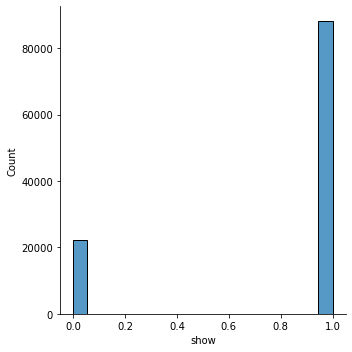

In [222]:
sns.displot(df['show'],label='show vs no-show');

as we can see 20% of patients don't show up

The final shape of the data is as below 

In [223]:
df.shape

(110526, 10)

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning our data let's answer the questions we had earlier using statistics and visualizations.

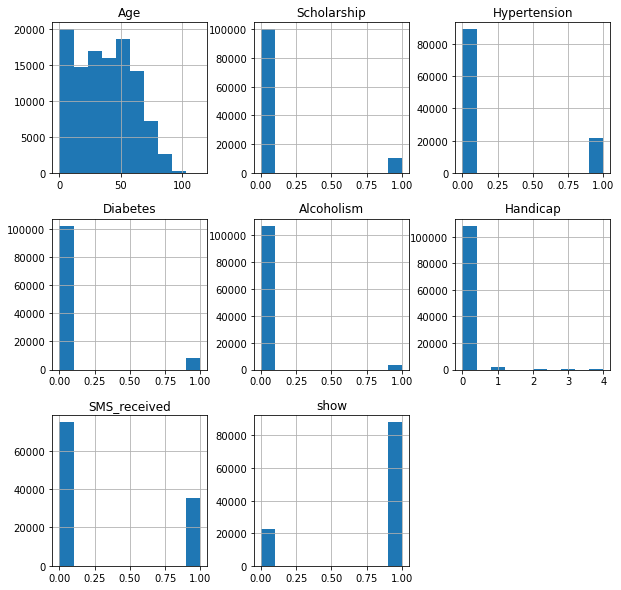

In [224]:
df.hist(figsize=(10,10));

In [225]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'show'],
      dtype='object')

In [226]:
def countplotting(A,B,C):
    """function to plot the count of features """
    sns.catplot(x=A, hue =B,col=C, data = df,kind='count',height=4, aspect=.7)

In [227]:
Categories = ['Gender','Hypertension','Alcoholism','Diabetes','SMS_received','Scholarship','Handicap']
for r in Categories :
    print(df.groupby(r)['show'].mean())

Gender
F    0.796851
M    0.800321
Name: show, dtype: float64
Hypertension
0    0.790961
1    0.826980
Name: show, dtype: float64
Alcoholism
0    0.798052
1    0.798512
Name: show, dtype: float64
Diabetes
0    0.796370
1    0.819967
Name: show, dtype: float64
SMS_received
0    0.832965
1    0.724255
Name: show, dtype: float64
Scholarship
0    0.801926
1    0.762637
Name: show, dtype: float64
Handicap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: show, dtype: float64


In [228]:
df.groupby(['show','Gender'], as_index=False).size()

,show,Gender,size
0,0,F,14594
1,0,M,7725
2,1,F,57245
3,1,M,30962


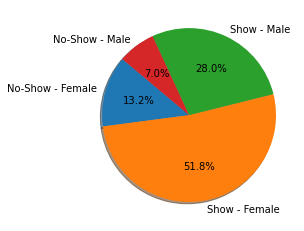

In [229]:
labels = ['No-Show - Female', 'Show - Female', 'Show - Male', 'No-Show - Male']
sizes = [len(df[(df['show'] == 0) & (df['Gender'] == 'F')]),
         len(df[(df['show'] == 1) & (df['Gender'] == 'F')]),        
         len(df[(df['show'] == 1) & (df['Gender'] == 'M')]),
         len(df[(df['show'] == 0) & (df['Gender'] == 'M')])]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

as we can see the percentage of females that don't show up are higher than the males. on the other hand, the percentage of females that show up is higher 
we can conclude that number of females that come to the clinic is higher than males  

In [230]:
df.groupby(['show','SMS_received'], as_index=False).size()

,show,SMS_received,size
0,0,0,12535
1,0,1,9784
2,1,0,62509
3,1,1,25698


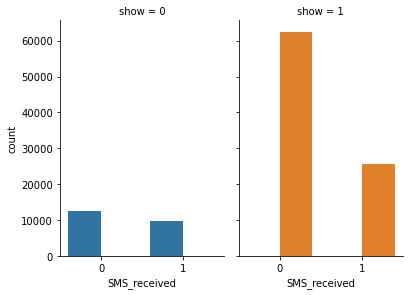

In [231]:
countplotting('SMS_received','show','show')

From the above visualization we can see that there are more than 60,000 patients who have not received SMS and out of them around 84% have come for the visit.
Out of the 25,000 patients who have received SMS around 72% of them have come for the visit.
we can conclude that recieving SMS have no correlation with the visit probability.

In [232]:

df.groupby(['show','Scholarship'], as_index=False).size()

,show,Scholarship,size
0,0,0,19741
1,0,1,2578
2,1,0,79924
3,1,1,8283


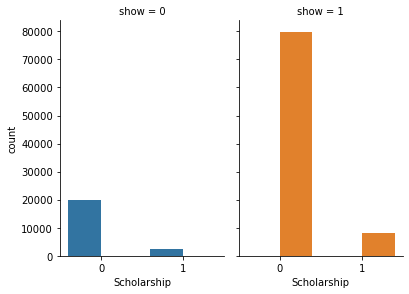

In [233]:
countplotting('Scholarship','show','show')


rom the above visualization we can see that there are around 80,000 patients without Scholarship and out of them around 80% have come for the visit.
Out of the 10,000 patients with Scholarship around 75% of them have come for the visit.
So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

In [234]:
df.groupby(['show','Diabetes'], as_index=False).size()

,show,Diabetes,size
0,0,0,20889
1,0,1,1430
2,1,0,81694
3,1,1,6513


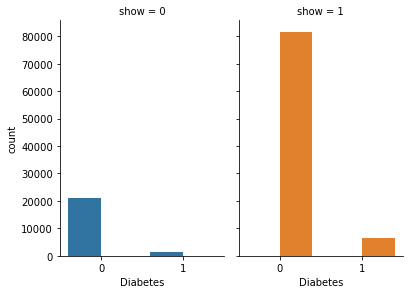

In [235]:
countplotting('Diabetes','show','show')

From the above visualization we can see that there are around 80,000 patients without Diabetes and out of them around 80% have come for the visit.
Out of the 8,000 patients with Diabetes around 83% of them have come for the visit.
So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

In [236]:
df.groupby(['show','Alcoholism'], as_index=False).size()

,show,Alcoholism,size
0,0,0,21642
1,0,1,677
2,1,0,85524
3,1,1,2683


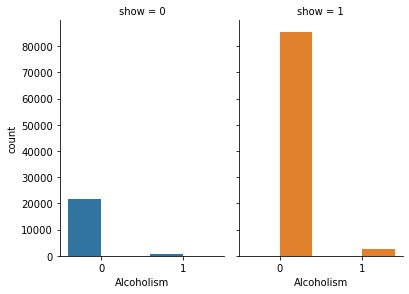

In [237]:
countplotting('Alcoholism','show','show')

From the above visualization we can see that there are around 90,000 patients without Alcoholism and out of them around 80% have come for the visit.
Out of the 5,000 patients with Alcoholism around 80% of them have come for the visit.
As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.

In [238]:
df.groupby(['show','Hypertension'], as_index=False).size()

,show,Hypertension,size
0,0,0,18547
1,0,1,3772
2,1,0,70178
3,1,1,18029


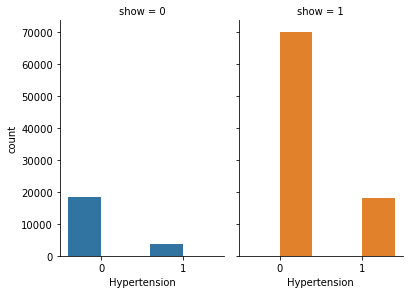

In [239]:
countplotting('Hypertension','show','show')


From the above visualization we can see that there are around 70,000 patients without Hypertension and out of them around 78% have come for the visit.
Out of the 19,000 patients with Hypertension around 85% of them have come for the visit.
So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

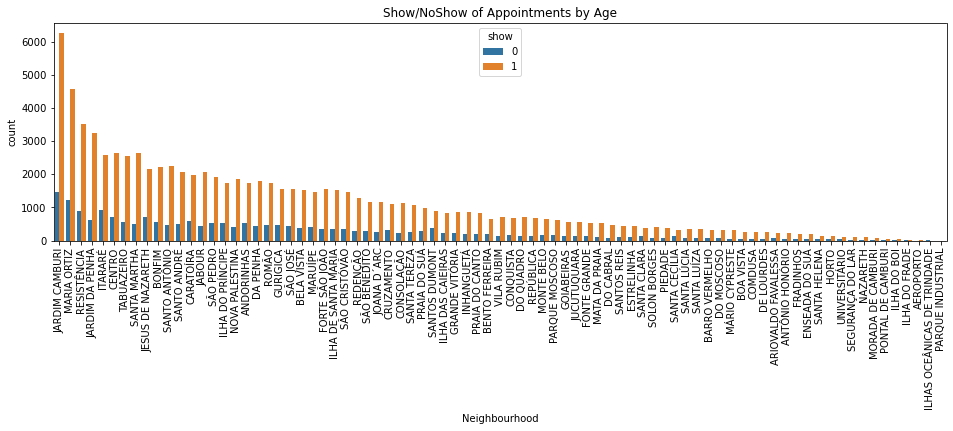

In [240]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df["Neighbourhood"] , hue = df["show"] , order =df["Neighbourhood"].value_counts().index)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

From the above visualization looks like the ratio of Show to NoShow is almost the same for all Neighbourhood's.
And most patients come from JARDIM CAMBURI 

In [241]:
df.groupby(['show','Handicap'], as_index=False).size()

,show,Handicap,size
0,0,0,21912
1,0,1,366
2,0,2,37
3,0,3,3
4,0,4,1
5,1,0,86373
6,1,1,1676
7,1,2,146
8,1,3,10
9,1,4,2


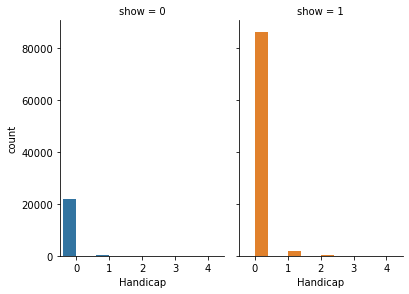

In [242]:
countplotting('Handicap','show','show')

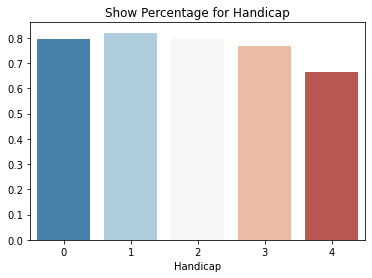

In [243]:
df_ha_ratio = df[df.show == 1].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

From the above visualization we can see that there are around ,000 patients without Handicap and out of them around 80% have come for the visit.
As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

presenting the distribution of average ages that shows up

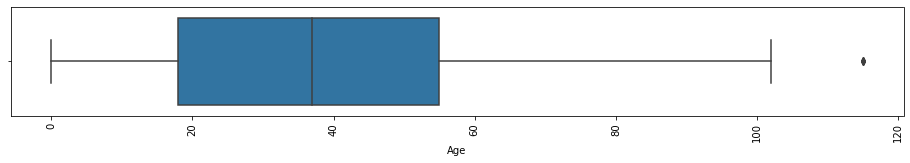

In [244]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
data = sns.boxplot(x=df.Age)

From the above BoxPlot we can see that the Median Age is around 30 and the IQR is between 18 and 55. Though the BoxPlot shows few datapoints as outliers we will not consider them as true outliers for this case.

<a id='conclusions'></a>
## Conclusions
From the above feature importance, we could see that Gender, Age, Neighbourhood, Scholarship and Hypertension are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.
> ##### The limitations associated with the conclusions are:

> The conclusion is not full proof that given the above requirement the movie will be a big hit but it can be.

> Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.

> This conclusion is not error proof.